In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.barabasi_albert_graph(2000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1070
Number of deinfluenced nodes: 0
Number of susceptible nodes: 930
influencer {128, 1536, 1666, 1286, 775, 269, 910, 1166, 1422, 1149, 1303, 1815, 665, 922, 1308, 1054, 542, 1570, 418, 420, 1959, 298, 428, 1456, 177, 818, 1460, 1205, 823, 56, 1212, 444, 578, 1734, 1741, 1870, 1485, 467, 860, 351, 865, 1250, 998, 871, 1000, 1386, 1015, 889, 507, 1405}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': set(), 'Degree': set()}), (3, {'Random': {1033}, 'Degree': set()}), (4, {'Random': {1977}, 'Degree': set()}), (5, {'Random': {1587}, 'Degree': set()}), (6, {'Random': {960}, 'Degree': set()}), (7, {'Random': {666, 1164}, 'Degree': set()}), (8, {'Random': {1089, 1156, 1605}, 'Degree': set()}), (9, {'Random': {354}, 'Degree': set()}), (10, {'Random': {585, 135}, 'Degree': set()}), (11, {'Random': {1051, 1047, 1094, 767}, 'Degree': set()}), (12, {'Random': {1737, 926, 1286, 1215}, 'Degree': set()}), (13, {'Random': {1312, 356, 745, 569, 1021}, 'Degree': set()}), (14, {'Random': {1705, 1803, 1741, 371, 1716, 1975, 1112}, 'Degree': set()}), (15, {'Random': {1504, 929, 616, 1929, 1965, 785, 534}, 'Degree': set()}), (16, {'Random': {931, 173, 1265, 343, 1884, 895}, 'Degree': set()}), (17, {'Random': {803, 1290, 1490, 603, 1055}, 'Degree': set()}), (18, {'Random': {769, 1036, 1518, 815, 943, 1399, 1884}, 'Degree': set()}), (19, {'Random'

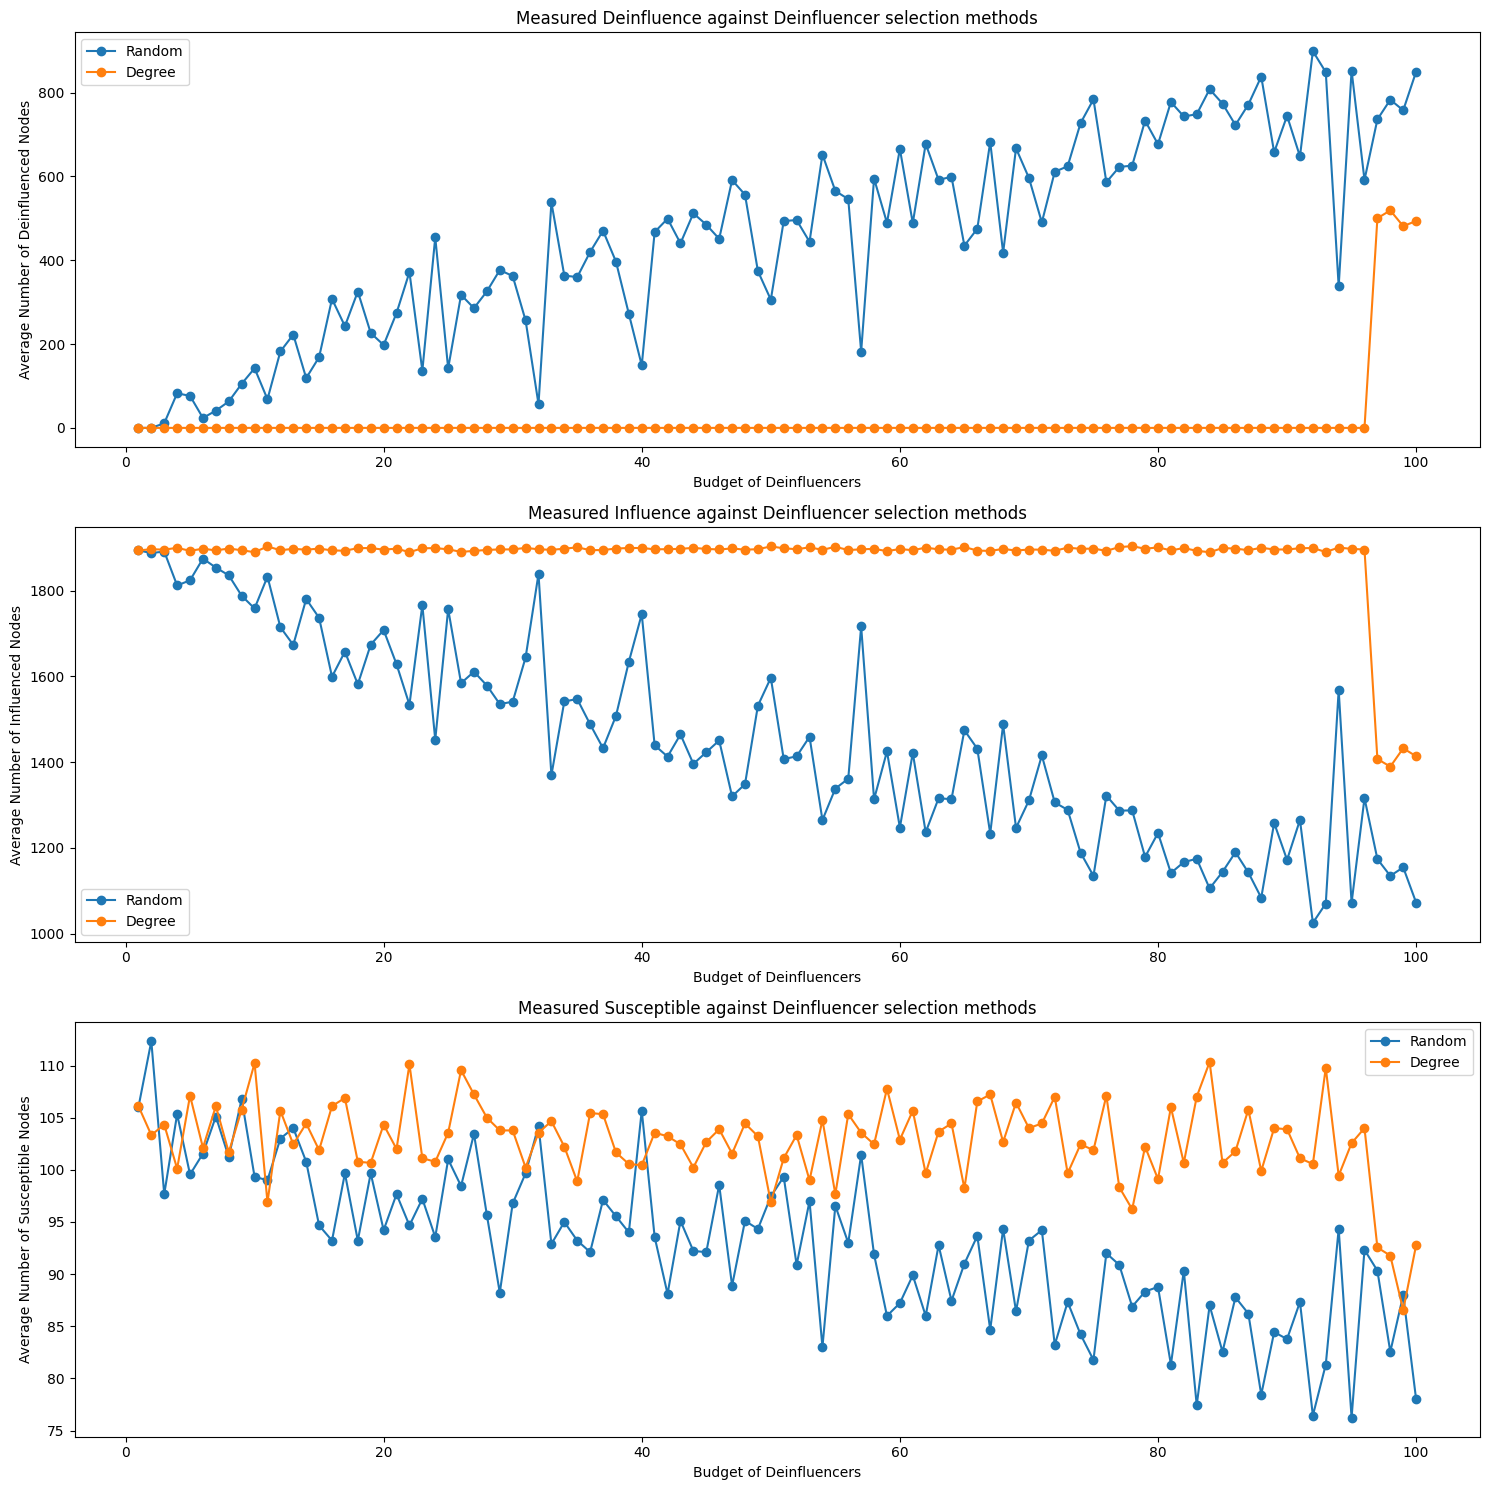

In [6]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()